Using backend: tensorflow.compat.v1

2021-12-13 17:23:43.713771: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term




heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0086 seconds


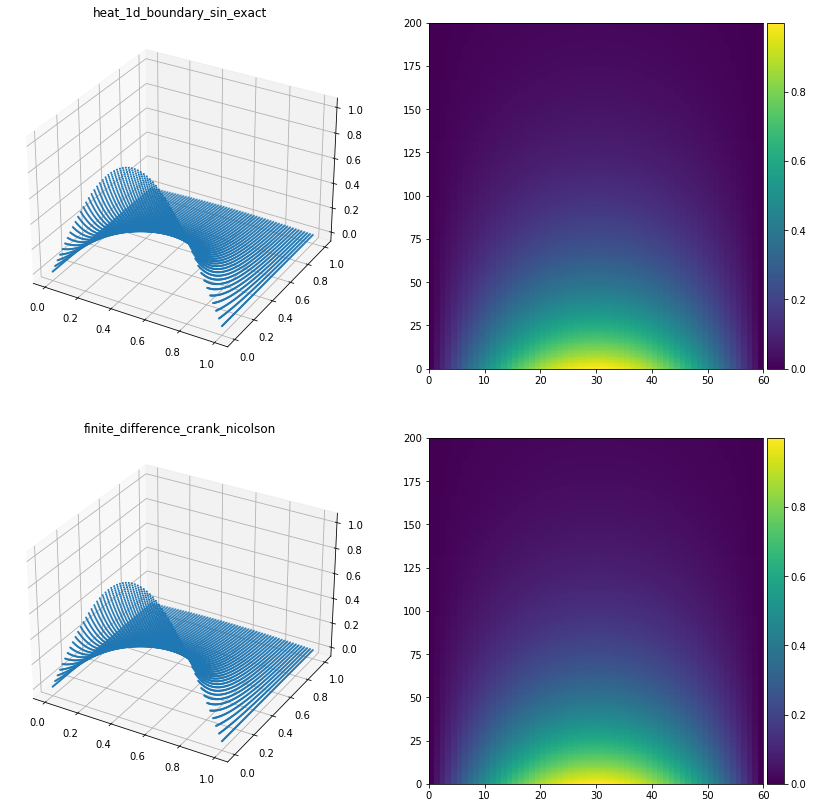

In [1]:
from heat_pinn import *
from project.gen_data import create_xt_grids, gen_solution

TIMER_REPEAT_TIMES = 25

@dataclass
class QuantPinnConstParam(PinnConstParam):
    mean_abs_error_threshold = 0.01
    def __str__(self) -> str:
        rs = super().__str__()
        rs = rs + "mean_abs_error_threshold: {}".format(self.mean_abs_error_threshold)
        return rs

def get_above_threshold(mae_dist_model, threshold):
    filtered = [m for m in mae_dist_model if m[1] >= threshold]
    if len(filtered) == 0:
        return None
    min_mae_dist_model = min(filtered, key=lambda x: float(x[1]))
    return min_mae_dist_model

# Generate constants throughout this app!!
const_params = QuantPinnConstParam()

solve_analytical_and_numerical(const_params)

plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)

In [2]:
hidden_layers = [3, 2, 1]
hidden_layer_sizes = [20, 15, 10, 5, 3]

# # Small test
# hidden_layers = [3]
# hidden_layer_sizes = [20, 15]

plot_results = []
mae_dist_models = []
for layer in hidden_layers:
    size_maes = []
    for size in hidden_layer_sizes:
        test_params = PinnTestParam()
        test_params.nn_hidden_layer_num = layer
        test_params.nn_hidden_layer_size = size
        geomtime_data, model = create_model(const_params, test_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, test_params])
        size_maes.append(mae)
    plot_results.append([layer, hidden_layer_sizes, size_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.027740 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 1.315744 s

Initializing variables...
Training model...



2021-12-13 17:23:48.151244: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-13 17:23:48.182384: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593265000 Hz
2021-12-13 17:23:48.242650: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


Step      Train loss                        Test loss                         Test metric
0         [7.53e-02, 2.82e-02, 4.35e-01]    [7.52e-02, 2.82e-02, 4.35e-01]    []  
1000      [1.84e-03, 8.99e-04, 9.37e-04]    [1.04e-03, 8.99e-04, 9.37e-04]    []  
2000      [2.47e-04, 2.12e-05, 2.54e-05]    [1.43e-04, 2.12e-05, 2.54e-05]    []  
3000      [1.03e-04, 1.62e-05, 2.23e-05]    [5.34e-05, 1.62e-05, 2.23e-05]    []  
4000      [7.26e-05, 4.00e-05, 5.63e-05]    [4.51e-05, 4.00e-05, 5.63e-05]    []  
5000      [4.91e-05, 1.25e-05, 2.21e-05]    [2.86e-05, 1.25e-05, 2.21e-05]    []  
6000      [6.01e-05, 6.55e-06, 2.84e-06]    [4.36e-05, 6.55e-06, 2.84e-06]    []  
7000      [2.91e-05, 1.59e-06, 1.95e-06]    [1.73e-05, 1.59e-06, 1.95e-06]    []  
8000      [2.45e-05, 1.27e-06, 1.49e-06]    [1.51e-05, 1.27e-06, 1.49e-06]    []  
9000      [2.12e-05, 1.01e-06, 1.17e-06]    [1.33e-05, 1.01e-06, 1.17e-06]    []  
10000     [1.89e-05, 8.40e-07, 9.73e-07]    [1.21e-05, 8.40e-07, 9.73e-07]    []

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.189327 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.28e-04, 5.25e-04, 4.75e-01]    [7.09e-04, 5.25e-04, 4.75e-01]    []  
1000      [1.61e-03, 1.30e-03, 2.65e-04]    [8.98e-04, 1.30e-03, 2.65e-04]    []  
2000      [2.77e-04, 5.84e-05, 1.57e-05]    [1.68e-04, 5.84e-05, 1.57e-05]    []  
3000      [3.57e-04, 3.48e-05, 2.23e-04]    [2.77e-04, 3.48e-05, 2.23e-04]    []  
4000      [4.31e-05, 2.73e-06, 3.12e-06]    [3.06e-05, 2.73e-06, 3.12e-06]    []  
5000      [2.75e-05, 2.50e-06, 1.92e-06]    [2.00e-05, 2.50e-06, 1.92e-06]    []  
6000      [2.04e-05, 2.08e-06, 1.67e-06]    [1.48e-05, 2.08e-06, 1.67e-06]    []  
7000      [2.95e-05, 5.59e-06, 1.36e-05]    [2.29e-05, 5.59e-06, 1.36e-05]    []  
8000      [1.41e-05, 1.62e-06, 9.52e-07]    [9.98e-06, 1.62e-06, 9.52e-07]    []  
9000      [1.92e-05, 3.05e-06, 5.95e-06]    [1.44e-05, 3.05e-06, 5.95e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.210983 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.14e-01, 6.71e-02, 3.98e-01]    [1.11e-01, 6.71e-02, 3.98e-01]    []  
1000      [3.05e-03, 1.34e-03, 1.55e-03]    [1.82e-03, 1.34e-03, 1.55e-03]    []  
2000      [4.55e-04, 7.78e-05, 4.51e-05]    [2.66e-04, 7.78e-05, 4.51e-05]    []  
3000      [1.54e-04, 5.18e-05, 1.75e-05]    [1.01e-04, 5.18e-05, 1.75e-05]    []  
4000      [8.13e-05, 4.73e-05, 2.02e-05]    [5.63e-05, 4.73e-05, 2.02e-05]    []  
5000      [4.96e-05, 3.37e-05, 7.46e-06]    [3.07e-05, 3.37e-05, 7.46e-06]    []  
6000      [4.68e-05, 3.49e-05, 1.70e-05]    [3.10e-05, 3.49e-05, 1.70e-05]    []  
7000      [3.21e-05, 2.13e-05, 3.90e-06]    [1.88e-05, 2.13e-05, 3.90e-06]    []  
8000      [2.78e-05, 1.56e-05, 3.48e-06]    [1.61e-05, 1.56e-05, 3.48e-06]    []  
9000      [2.59e-05, 1.24e-05, 2.83e-06]    [1.52e-05, 1.24e-05, 2.83e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.239219 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.57e-01, 1.84e-01, 2.64e-01]    [1.53e-01, 1.84e-01, 2.64e-01]    []  
1000      [9.49e-03, 1.59e-02, 2.33e-02]    [6.40e-03, 1.59e-02, 2.33e-02]    []  
2000      [3.34e-03, 6.63e-04, 8.42e-04]    [2.13e-03, 6.63e-04, 8.42e-04]    []  
3000      [1.74e-03, 1.52e-04, 1.97e-04]    [1.22e-03, 1.52e-04, 1.97e-04]    []  
4000      [1.10e-03, 1.02e-04, 9.54e-05]    [7.85e-04, 1.02e-04, 9.54e-05]    []  
5000      [8.42e-04, 7.71e-05, 5.13e-05]    [6.17e-04, 7.71e-05, 5.13e-05]    []  
6000      [6.28e-04, 5.05e-05, 2.37e-05]    [4.56e-04, 5.05e-05, 2.37e-05]    []  
7000      [4.63e-04, 2.97e-05, 1.15e-05]    [3.33e-04, 2.97e-05, 1.15e-05]    []  
8000      [3.52e-04, 2.15e-05, 1.33e-05]    [2.50e-04, 2.15e-05, 1.33e-05]    []  
9000      [2.66e-04, 1.00e-05, 4.37e-06]    [1.86e-04, 1.00e-05, 4.37e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.230716 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.94e-02, 3.11e-02, 3.43e-01]    [3.22e-02, 3.11e-02, 3.43e-01]    []  
1000      [2.17e-02, 3.72e-02, 7.05e-02]    [1.80e-02, 3.72e-02, 7.05e-02]    []  
2000      [6.33e-03, 3.83e-03, 5.58e-03]    [3.31e-03, 3.83e-03, 5.58e-03]    []  
3000      [2.48e-03, 6.22e-04, 2.63e-04]    [1.58e-03, 6.22e-04, 2.63e-04]    []  
4000      [1.90e-03, 4.06e-04, 1.05e-04]    [1.24e-03, 4.06e-04, 1.05e-04]    []  
5000      [1.48e-03, 2.92e-04, 6.44e-05]    [9.61e-04, 2.92e-04, 6.44e-05]    []  
6000      [1.17e-03, 2.16e-04, 4.43e-05]    [7.69e-04, 2.16e-04, 4.43e-05]    []  
7000      [8.99e-04, 1.61e-04, 3.24e-05]    [5.95e-04, 1.61e-04, 3.24e-05]    []  
8000      [6.73e-04, 1.42e-04, 2.65e-05]    [4.53e-04, 1.42e-04, 2.65e-05]    []  
9000      [5.30e-04, 1.32e-04, 2.49e-05]    [3.63e-04, 1.32e-04, 2.49e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.199568 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.54e-03, 9.35e-02, 8.27e-01]    [1.38e-03, 9.35e-02, 8.27e-01]    []  
1000      [4.07e-03, 4.71e-03, 6.59e-03]    [2.37e-03, 4.71e-03, 6.59e-03]    []  
2000      [1.36e-03, 4.88e-04, 4.06e-04]    [8.42e-04, 4.88e-04, 4.06e-04]    []  
3000      [4.34e-04, 8.23e-05, 1.05e-04]    [3.28e-04, 8.23e-05, 1.05e-04]    []  
4000      [2.37e-04, 4.43e-05, 5.80e-05]    [1.81e-04, 4.43e-05, 5.80e-05]    []  
5000      [1.60e-04, 2.24e-05, 3.58e-05]    [1.17e-04, 2.24e-05, 3.58e-05]    []  
6000      [1.14e-04, 1.37e-05, 2.42e-05]    [8.06e-05, 1.37e-05, 2.42e-05]    []  
7000      [1.06e-04, 2.03e-05, 1.86e-05]    [8.02e-05, 2.03e-05, 1.86e-05]    []  
8000      [6.68e-05, 9.55e-06, 1.30e-05]    [4.64e-05, 9.55e-06, 1.30e-05]    []  
9000      [5.32e-05, 7.82e-06, 1.03e-05]    [3.65e-05, 7.82e-06, 1.03e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.207841 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.32e-01, 1.67e-01, 2.76e-01]    [1.27e-01, 1.67e-01, 2.76e-01]    []  
1000      [8.83e-03, 8.83e-03, 1.55e-02]    [6.30e-03, 8.83e-03, 1.55e-02]    []  
2000      [1.02e-03, 2.45e-04, 4.49e-04]    [5.78e-04, 2.45e-04, 4.49e-04]    []  
3000      [3.43e-04, 1.66e-05, 4.30e-05]    [2.35e-04, 1.66e-05, 4.30e-05]    []  
4000      [2.28e-04, 1.01e-05, 2.70e-05]    [1.74e-04, 1.01e-05, 2.70e-05]    []  
5000      [1.51e-04, 5.78e-06, 1.49e-05]    [1.14e-04, 5.78e-06, 1.49e-05]    []  
6000      [1.15e-04, 5.73e-06, 2.28e-05]    [9.25e-05, 5.73e-06, 2.28e-05]    []  
7000      [8.42e-05, 2.70e-06, 8.54e-06]    [6.56e-05, 2.70e-06, 8.54e-06]    []  
8000      [6.78e-05, 2.28e-06, 7.01e-06]    [5.32e-05, 2.28e-06, 7.01e-06]    []  
9000      [8.68e-05, 2.06e-05, 1.22e-05]    [7.31e-05, 2.06e-05, 1.22e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.218097 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [8.12e-02, 3.50e-02, 2.92e-01]    [8.24e-02, 3.50e-02, 2.92e-01]    []  
1000      [6.07e-03, 7.57e-03, 1.54e-02]    [3.17e-03, 7.57e-03, 1.54e-02]    []  
2000      [9.41e-04, 5.44e-04, 6.89e-04]    [4.83e-04, 5.44e-04, 6.89e-04]    []  
3000      [4.86e-04, 6.45e-05, 9.71e-05]    [2.79e-04, 6.45e-05, 9.71e-05]    []  
4000      [3.02e-04, 4.06e-05, 3.89e-05]    [1.76e-04, 4.06e-05, 3.89e-05]    []  
5000      [2.07e-04, 3.03e-05, 1.75e-05]    [1.22e-04, 3.03e-05, 1.75e-05]    []  
6000      [1.51e-04, 2.42e-05, 8.80e-06]    [9.05e-05, 2.42e-05, 8.80e-06]    []  
7000      [1.08e-04, 1.98e-05, 4.65e-06]    [7.11e-05, 1.98e-05, 4.65e-06]    []  
8000      [8.65e-05, 1.68e-05, 3.40e-06]    [5.91e-05, 1.68e-05, 3.40e-06]    []  
9000      [6.74e-05, 1.41e-05, 1.47e-06]    [5.00e-05, 1.41e-05, 1.47e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.231294 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.39e-01, 6.63e-02, 7.10e-01]    [5.80e-01, 6.63e-02, 7.10e-01]    []  
1000      [2.02e-02, 3.36e-02, 7.11e-02]    [1.45e-02, 3.36e-02, 7.11e-02]    []  
2000      [8.41e-03, 1.62e-02, 2.70e-02]    [4.21e-03, 1.62e-02, 2.70e-02]    []  
3000      [6.52e-03, 4.87e-03, 8.78e-03]    [3.38e-03, 4.87e-03, 8.78e-03]    []  
4000      [4.46e-03, 1.78e-03, 2.50e-03]    [2.72e-03, 1.78e-03, 2.50e-03]    []  
5000      [2.42e-03, 7.24e-04, 4.89e-04]    [1.66e-03, 7.24e-04, 4.89e-04]    []  
6000      [1.64e-03, 3.87e-04, 1.31e-04]    [1.26e-03, 3.87e-04, 1.31e-04]    []  
7000      [1.04e-03, 2.55e-04, 5.74e-05]    [7.76e-04, 2.55e-04, 5.74e-05]    []  
8000      [5.30e-04, 1.38e-04, 1.83e-05]    [3.86e-04, 1.38e-04, 1.83e-05]    []  
9000      [3.44e-04, 8.40e-05, 6.67e-06]    [2.54e-04, 8.40e-05, 6.67e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.245504 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.42e-02, 1.04e-01, 1.00e+00]    [3.59e-02, 1.04e-01, 1.00e+00]    []  
1000      [2.84e-02, 5.00e-02, 1.08e-01]    [2.38e-02, 5.00e-02, 1.08e-01]    []  
2000      [2.82e-02, 3.78e-02, 8.24e-02]    [2.24e-02, 3.78e-02, 8.24e-02]    []  
3000      [2.04e-02, 2.46e-02, 5.47e-02]    [1.35e-02, 2.46e-02, 5.47e-02]    []  
4000      [1.78e-02, 8.43e-03, 2.03e-02]    [1.12e-02, 8.43e-03, 2.03e-02]    []  
5000      [1.81e-02, 4.90e-03, 1.04e-02]    [1.31e-02, 4.90e-03, 1.04e-02]    []  
6000      [1.59e-02, 3.98e-03, 7.11e-03]    [1.20e-02, 3.98e-03, 7.11e-03]    []  
7000      [1.29e-02, 4.38e-03, 5.69e-03]    [9.82e-03, 4.38e-03, 5.69e-03]    []  
8000      [1.16e-02, 4.52e-03, 4.61e-03]    [8.87e-03, 4.52e-03, 4.61e-03]    []  
9000      [1.12e-02, 4.50e-03, 4.25e-03]    [8.56e-03, 4.50e-03, 4.25e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.240093 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.21e-01, 9.58e-02, 3.38e-01]    [4.17e-01, 9.58e-02, 3.38e-01]    []  
1000      [1.05e-02, 3.66e-02, 6.72e-02]    [8.71e-03, 3.66e-02, 6.72e-02]    []  
2000      [6.60e-03, 2.76e-02, 4.14e-02]    [4.78e-03, 2.76e-02, 4.14e-02]    []  
3000      [6.57e-03, 1.27e-02, 2.37e-02]    [4.27e-03, 1.27e-02, 2.37e-02]    []  
4000      [4.66e-03, 4.00e-03, 7.71e-03]    [3.30e-03, 4.00e-03, 7.71e-03]    []  
5000      [3.37e-03, 2.25e-03, 4.12e-03]    [2.39e-03, 2.25e-03, 4.12e-03]    []  
6000      [1.83e-03, 8.83e-04, 1.54e-03]    [1.27e-03, 8.83e-04, 1.54e-03]    []  
7000      [1.78e-03, 3.50e-04, 7.35e-04]    [1.26e-03, 3.50e-04, 7.35e-04]    []  
8000      [1.56e-03, 2.61e-04, 5.15e-04]    [1.11e-03, 2.61e-04, 5.15e-04]    []  
9000      [1.31e-03, 2.22e-04, 4.22e-04]    [9.23e-04, 2.22e-04, 4.22e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.219454 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.17e-03, 6.60e-02, 7.92e-01]    [7.05e-03, 6.60e-02, 7.92e-01]    []  
1000      [1.09e-02, 4.01e-02, 8.30e-02]    [8.62e-03, 4.01e-02, 8.30e-02]    []  
2000      [1.01e-02, 1.95e-02, 4.04e-02]    [6.42e-03, 1.95e-02, 4.04e-02]    []  
3000      [8.78e-03, 5.40e-03, 1.44e-02]    [6.18e-03, 5.40e-03, 1.44e-02]    []  
4000      [7.40e-03, 3.19e-03, 8.07e-03]    [5.58e-03, 3.19e-03, 8.07e-03]    []  
5000      [3.84e-03, 1.54e-03, 3.68e-03]    [2.74e-03, 1.54e-03, 3.68e-03]    []  
6000      [3.43e-03, 8.95e-04, 2.16e-03]    [2.61e-03, 8.95e-04, 2.16e-03]    []  
7000      [3.16e-03, 6.64e-04, 1.53e-03]    [2.47e-03, 6.64e-04, 1.53e-03]    []  
8000      [2.79e-03, 6.05e-04, 1.27e-03]    [2.19e-03, 6.05e-04, 1.27e-03]    []  
9000      [2.42e-03, 5.40e-04, 1.05e-03]    [1.89e-03, 5.40e-04, 1.05e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.232576 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.11e-01, 2.44e-01, 2.68e-01]    [2.04e-01, 2.44e-01, 2.68e-01]    []  
1000      [1.22e-02, 3.60e-02, 7.07e-02]    [1.01e-02, 3.60e-02, 7.07e-02]    []  
2000      [6.26e-03, 2.84e-02, 3.99e-02]    [4.76e-03, 2.84e-02, 3.99e-02]    []  
3000      [5.18e-03, 1.62e-02, 2.45e-02]    [3.20e-03, 1.62e-02, 2.45e-02]    []  
4000      [7.09e-03, 4.23e-03, 9.92e-03]    [4.68e-03, 4.23e-03, 9.92e-03]    []  
5000      [5.55e-03, 2.00e-03, 5.36e-03]    [3.91e-03, 2.00e-03, 5.36e-03]    []  
6000      [3.30e-03, 1.46e-03, 3.18e-03]    [2.27e-03, 1.46e-03, 3.18e-03]    []  
7000      [2.29e-03, 1.08e-03, 1.70e-03]    [1.65e-03, 1.08e-03, 1.70e-03]    []  
8000      [1.77e-03, 6.25e-04, 9.93e-04]    [1.29e-03, 6.25e-04, 9.93e-04]    []  
9000      [8.89e-04, 4.02e-04, 4.49e-04]    [6.22e-04, 4.02e-04, 4.49e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.240365 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.85e-02, 1.53e-02, 6.13e-01]    [2.85e-02, 1.53e-02, 6.13e-01]    []  
1000      [2.34e-02, 4.27e-02, 8.90e-02]    [2.02e-02, 4.27e-02, 8.90e-02]    []  
2000      [1.30e-02, 3.00e-02, 5.61e-02]    [9.54e-03, 3.00e-02, 5.61e-02]    []  
3000      [1.45e-02, 2.73e-02, 4.57e-02]    [1.11e-02, 2.73e-02, 4.57e-02]    []  
4000      [1.43e-02, 2.46e-02, 4.18e-02]    [1.15e-02, 2.46e-02, 4.18e-02]    []  
5000      [1.36e-02, 1.97e-02, 3.58e-02]    [1.12e-02, 1.97e-02, 3.58e-02]    []  
6000      [1.42e-02, 1.23e-02, 2.29e-02]    [1.15e-02, 1.23e-02, 2.29e-02]    []  
7000      [1.27e-02, 5.46e-03, 1.45e-02]    [9.03e-03, 5.46e-03, 1.45e-02]    []  
8000      [1.14e-02, 3.21e-03, 9.53e-03]    [8.19e-03, 3.21e-03, 9.53e-03]    []  
9000      [1.09e-02, 2.46e-03, 8.08e-03]    [7.82e-03, 2.46e-03, 8.08e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.241027 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.02e-01, 1.78e-01, 1.21e+00]    [4.12e-01, 1.78e-01, 1.21e+00]    []  
1000      [2.09e-02, 8.23e-02, 1.70e-01]    [2.15e-02, 8.23e-02, 1.70e-01]    []  
2000      [1.78e-02, 7.63e-02, 1.63e-01]    [1.77e-02, 7.63e-02, 1.63e-01]    []  
3000      [1.37e-02, 5.75e-02, 1.23e-01]    [1.21e-02, 5.75e-02, 1.23e-01]    []  
4000      [1.38e-02, 3.51e-02, 6.70e-02]    [1.10e-02, 3.51e-02, 6.70e-02]    []  
5000      [1.18e-02, 2.95e-02, 4.77e-02]    [9.90e-03, 2.95e-02, 4.77e-02]    []  
6000      [1.72e-02, 2.32e-02, 4.24e-02]    [1.47e-02, 2.32e-02, 4.24e-02]    []  
7000      [2.22e-02, 1.66e-02, 3.70e-02]    [1.91e-02, 1.66e-02, 3.70e-02]    []  
8000      [2.46e-02, 1.34e-02, 3.35e-02]    [2.12e-02, 1.34e-02, 3.35e-02]    []  
9000      [2.50e-02, 1.21e-02, 3.15e-02]    [2.17e-02, 1.21e-02, 3.15e-02]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20035     [2.43e-02, 9.67e-03, 2.69e-02]    [2.12e-02, 9.67e-03, 2.69e-02]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.060873
  Number of iterations: 1
  Number of functions evaluations: 13
20048     [2.43e-02, 9.67e-03, 2.69e-02]    [2.12e-02, 9.67e-03, 2.69e-02]    []  

Best model at step 20035:
  train loss: 6.09e-02
  test loss: 5.78e-02
  test metric: []

'train' took 1.180152 s

NN prediction: Average time with 25 tries: 0.0004 seconds


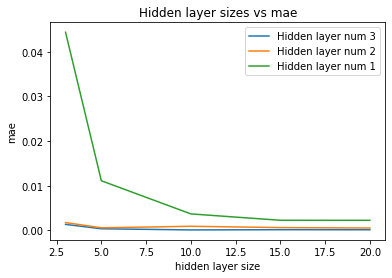

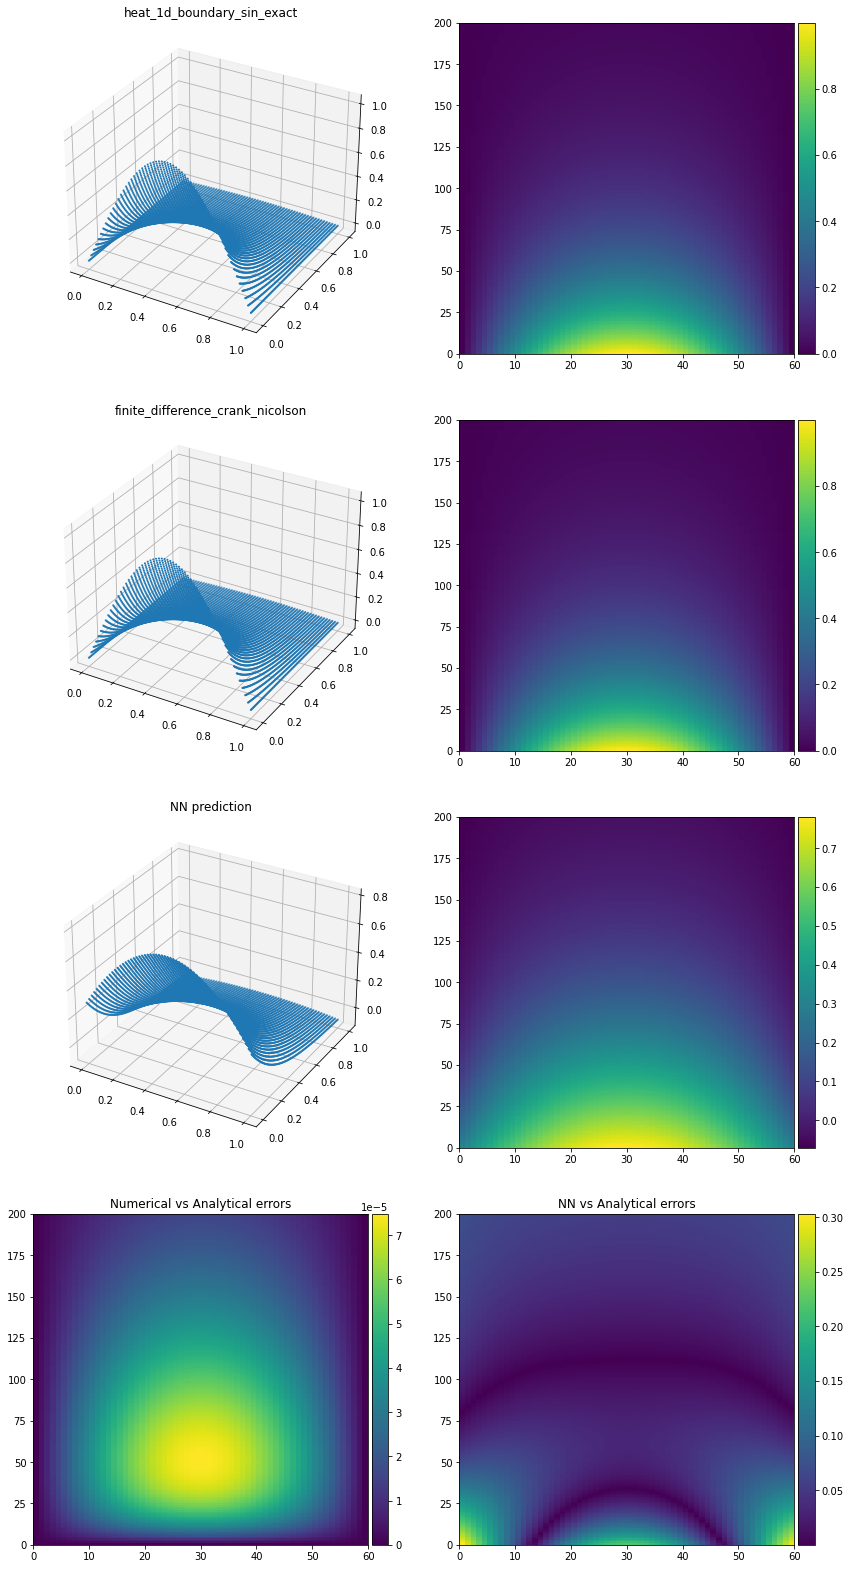

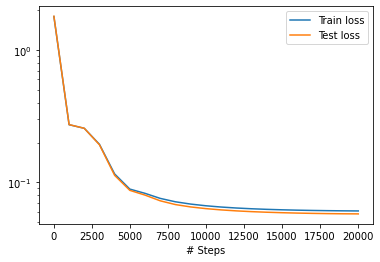

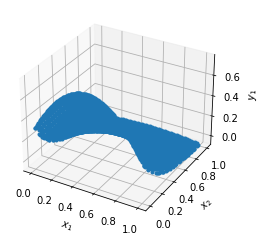

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.04435602791126549
Mean squared error:  0.0034304303515118317
Max error:  0.3028895854949951
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 3
nn_hidden_layer_num: 1



In [3]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Hidden layer num" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("hidden layer size")
    ax.set_ylabel("mae")
    ax.title.set_text("Hidden layer sizes vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    predict_and_output_report(const_params, mae_dist_model[2], *model.train(), test_params = mae_dist_model[3])

# Test 2: Reduce train data (domain and bc) to break solution

In [4]:
num_domains = [2540, 100, 50, 10]
num_bcs = [100, 26, 10, 4]

# # Small test
# num_domains = [10]
# num_bcs = [10, 4]

plot_results = []
mae_dist_models = []
for num_domain in num_domains:
    num_bc_maes = []
    for num_bc in num_bcs:
        test_params = PinnTestParam()
        test_params.d_num_domain = int(num_domain)
        test_params.d_num_boundary = int(num_bc/2)
        test_params.d_num_initial = int(num_bc/2)
        geomtime_data, model = create_model(const_params, test_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, test_params])
        num_bc_maes.append(mae)
    plot_results.append([num_domain, num_bcs, num_bc_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.030583 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.354223 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.25e-02, 3.66e-02, 3.97e-01]    [4.27e-02, 3.66e-02, 3.97e-01]    []  
1000      [8.04e-04, 6.00e-04, 2.46e-04]    [5.13e-04, 6.00e-04, 2.46e-04]    []  
2000      [1.39e-04, 1.30e-05, 2.38e-05]    [8.37e-05, 1.30e-05, 2.38e-05]    []  
3000      [6.70e-05, 2.58e-06, 8.98e-06]    [4.06e-05, 2.58e-06, 8.98e-06]    []  
4000      [2.98e-04, 2.25e-05, 1.39e-04]    [2.62e-04, 2.25e-05, 1.39e-04]    []  
5000      [3.15e-05, 2.58e-06, 5.48e-06]    [1.94e-05, 2.58e-06, 5.48e-06]    []  
6000      [2.31e-05, 5.08e-06, 5.63e-06]    [1.45e-05, 5.08e-06, 5.63e-06]    []  
7000      [1.75e-05, 7.17e-07, 1.82e-06]    [1.14e-05, 7.17e-07, 1.82e-06]    []  
8000      [1.44e-05, 6.17e-07, 1.45e-06]    [9.61e-06, 6.17e-07, 1.45e-06]    []  
9000      [1.34e-05, 2.26e-06, 1.38e-06]    [9.63e-06, 2.26e-06, 1.38e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.353878 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [9.56e-01, 1.03e+00, 1.92e-01]    [9.49e-01, 1.03e+00, 1.92e-01]    []  
1000      [3.43e-03, 1.29e-02, 1.66e-02]    [2.76e-03, 1.29e-02, 1.66e-02]    []  
2000      [1.71e-03, 4.16e-04, 1.21e-03]    [1.23e-03, 4.16e-04, 1.21e-03]    []  
3000      [4.19e-04, 9.94e-05, 1.32e-04]    [3.13e-04, 9.94e-05, 1.32e-04]    []  
4000      [1.05e-04, 4.79e-05, 8.70e-06]    [7.45e-05, 4.79e-05, 8.70e-06]    []  
5000      [5.66e-05, 3.22e-05, 3.32e-06]    [4.15e-05, 3.22e-05, 3.32e-06]    []  
6000      [3.60e-05, 4.76e-05, 3.86e-05]    [2.70e-05, 4.76e-05, 3.86e-05]    []  
7000      [4.50e-05, 2.30e-05, 1.63e-06]    [3.85e-05, 2.30e-05, 1.63e-06]    []  
8000      [1.84e-05, 1.43e-05, 9.28e-07]    [1.34e-05, 1.43e-05, 9.28e-07]    []  
9000      [1.44e-05, 1.13e-05, 7.51e-07]    [1.06e-05, 1.13e-05, 7.51e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.374513 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.81e-01, 4.09e-02, 8.89e-01]    [1.81e-01, 4.09e-02, 8.89e-01]    []  
1000      [9.78e-04, 2.95e-04, 4.44e-03]    [8.25e-04, 2.95e-04, 4.44e-03]    []  
2000      [6.18e-04, 6.30e-05, 3.62e-04]    [5.24e-04, 6.30e-05, 3.62e-04]    []  
3000      [2.04e-04, 3.39e-05, 7.39e-05]    [1.60e-04, 3.39e-05, 7.39e-05]    []  
4000      [5.93e-05, 1.94e-05, 2.92e-05]    [4.44e-05, 1.94e-05, 2.92e-05]    []  
5000      [7.77e-05, 4.31e-05, 6.62e-05]    [7.13e-05, 4.31e-05, 6.62e-05]    []  
6000      [2.31e-05, 5.52e-06, 1.12e-05]    [1.76e-05, 5.52e-06, 1.12e-05]    []  
7000      [1.92e-05, 3.16e-06, 6.81e-06]    [1.55e-05, 3.16e-06, 6.81e-06]    []  
8000      [1.33e-05, 4.50e-07, 3.48e-06]    [9.99e-06, 4.50e-07, 3.48e-06]    []  
9000      [1.18e-05, 2.09e-06, 4.92e-06]    [9.07e-06, 2.09e-06, 4.92e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 17:31:52.693157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful N

'compile' took 0.386088 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.69e-01, 1.76e-02, 6.16e-01]    [1.69e-01, 1.76e-02, 6.16e-01]    []  
1000      [1.83e-04, 1.11e-06, 7.05e-07]    [1.57e-04, 1.11e-06, 7.05e-07]    []  
2000      [3.15e-05, 8.26e-08, 1.68e-08]    [2.62e-05, 8.26e-08, 1.68e-08]    []  
3000      [1.53e-05, 2.78e-09, 1.04e-08]    [1.31e-05, 2.78e-09, 1.04e-08]    []  
4000      [1.06e-05, 2.65e-09, 2.45e-09]    [9.29e-06, 2.65e-09, 2.45e-09]    []  
5000      [8.03e-06, 3.49e-09, 1.40e-08]    [7.05e-06, 3.49e-09, 1.40e-08]    []  
6000      [1.55e-05, 5.77e-05, 4.68e-05]    [1.37e-05, 5.77e-05, 4.68e-05]    []  
7000      [5.09e-06, 9.03e-10, 5.19e-10]    [4.49e-06, 9.03e-10, 5.19e-10]    []  
8000      [4.30e-06, 3.50e-09, 3.66e-10]    [3.79e-06, 3.50e-09, 3.66e-10]    []  
9000      [3.89e-06, 1.01e-06, 8.93e-07]    [3.43e-06, 1.01e-06, 8.93e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.399695 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.74e-02, 1.08e-01, 2.08e-01]    [2.93e-02, 1.08e-01, 2.08e-01]    []  
1000      [7.86e-04, 3.51e-04, 1.46e-04]    [5.11e-04, 3.51e-04, 1.46e-04]    []  
2000      [8.93e-05, 1.02e-05, 1.29e-05]    [1.14e-04, 1.02e-05, 1.29e-05]    []  
3000      [4.12e-05, 4.95e-06, 8.05e-06]    [6.81e-05, 4.95e-06, 8.05e-06]    []  
4000      [2.45e-05, 2.79e-06, 5.40e-06]    [4.92e-05, 2.79e-06, 5.40e-06]    []  
5000      [1.68e-05, 1.69e-06, 3.83e-06]    [3.82e-05, 1.69e-06, 3.83e-06]    []  
6000      [1.28e-05, 1.13e-06, 2.83e-06]    [3.15e-05, 1.13e-06, 2.83e-06]    []  
7000      [1.74e-05, 1.11e-06, 2.39e-06]    [2.63e-05, 1.11e-06, 2.39e-06]    []  
8000      [1.06e-05, 7.56e-07, 1.95e-06]    [2.33e-05, 7.56e-07, 1.95e-06]    []  
9000      [9.89e-06, 7.15e-07, 1.66e-06]    [2.08e-05, 7.15e-07, 1.66e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.439918 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.11e-02, 1.50e-02, 4.99e-01]    [3.23e-02, 1.50e-02, 4.99e-01]    []  
1000      [1.22e-03, 3.02e-04, 4.29e-04]    [7.85e-04, 3.02e-04, 4.29e-04]    []  
2000      [2.57e-04, 3.29e-05, 4.42e-05]    [1.89e-04, 3.29e-05, 4.42e-05]    []  
3000      [1.13e-04, 1.78e-05, 1.79e-05]    [9.10e-05, 1.78e-05, 1.79e-05]    []  
4000      [5.11e-05, 1.05e-05, 8.78e-06]    [5.58e-05, 1.05e-05, 8.78e-06]    []  
5000      [2.89e-05, 6.72e-06, 5.59e-06]    [4.07e-05, 6.72e-06, 5.59e-06]    []  
6000      [2.99e-05, 6.02e-06, 4.54e-06]    [4.74e-05, 6.02e-06, 4.54e-06]    []  
7000      [1.72e-05, 3.24e-06, 3.14e-06]    [2.76e-05, 3.24e-06, 3.14e-06]    []  
8000      [8.24e-04, 2.01e-05, 1.38e-04]    [4.82e-04, 2.01e-05, 1.38e-04]    []  
9000      [1.29e-05, 2.24e-06, 2.31e-06]    [2.12e-05, 2.24e-06, 2.31e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.427640 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.85e-01, 5.56e-02, 1.31e+00]    [1.79e-01, 5.56e-02, 1.31e+00]    []  
1000      [1.44e-03, 1.46e-04, 7.83e-03]    [6.09e-03, 1.46e-04, 7.83e-03]    []  
2000      [3.39e-04, 7.07e-06, 2.14e-04]    [1.42e-02, 7.07e-06, 2.14e-04]    []  
3000      [9.00e-05, 2.71e-06, 1.85e-05]    [9.46e-03, 2.71e-06, 1.85e-05]    []  
4000      [5.05e-05, 1.55e-06, 8.50e-06]    [7.09e-03, 1.55e-06, 8.50e-06]    []  
5000      [3.38e-05, 1.28e-06, 5.79e-06]    [5.77e-03, 1.28e-06, 5.79e-06]    []  
6000      [2.29e-05, 5.93e-07, 3.41e-06]    [5.06e-03, 5.93e-07, 3.41e-06]    []  
7000      [1.59e-05, 3.50e-07, 2.35e-06]    [4.52e-03, 3.50e-07, 2.35e-06]    []  
8000      [2.31e-05, 5.21e-06, 3.74e-06]    [4.02e-03, 5.21e-06, 3.74e-06]    []  
9000      [8.06e-06, 1.37e-07, 1.27e-06]    [3.73e-03, 1.37e-07, 1.27e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 17:34:16.066917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUM

'compile' took 0.434911 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.84e-01, 2.39e-01, 7.03e-01]    [4.80e-01, 2.39e-01, 7.03e-01]    []  
1000      [1.85e-03, 2.00e-04, 4.67e-04]    [1.96e-03, 2.00e-04, 4.67e-04]    []  
2000      [8.62e-05, 8.06e-07, 1.77e-06]    [1.30e-04, 8.05e-07, 1.77e-06]    []  
3000      [3.69e-05, 2.92e-05, 2.76e-05]    [6.33e-05, 2.92e-05, 2.76e-05]    []  
4000      [1.84e-05, 2.53e-07, 5.08e-07]    [3.36e-05, 2.53e-07, 5.08e-07]    []  
5000      [1.05e-05, 9.75e-09, 5.88e-08]    [2.01e-05, 9.78e-09, 5.88e-08]    []  
6000      [6.50e-06, 5.41e-09, 1.98e-08]    [1.28e-05, 5.39e-09, 1.98e-08]    []  
7000      [4.46e-06, 4.10e-09, 7.06e-09]    [8.98e-06, 4.08e-09, 7.10e-09]    []  
8000      [3.39e-06, 1.54e-09, 3.48e-09]    [6.95e-06, 1.54e-09, 3.47e-09]    []  
9000      [2.81e-06, 3.88e-10, 2.21e-09]    [5.85e-06, 3.85e-10, 2.22e-09]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 17:34:48.473800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA 

'compile' took 0.625951 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.09e-01, 2.27e-01, 4.88e-01]    [5.43e-01, 2.27e-01, 4.88e-01]    []  
1000      [4.01e-03, 6.52e-03, 9.86e-03]    [3.00e-03, 6.52e-03, 9.86e-03]    []  
2000      [6.22e-04, 2.05e-04, 1.74e-04]    [7.26e-04, 2.05e-04, 1.74e-04]    []  
3000      [1.67e-04, 2.35e-05, 1.22e-05]    [6.25e-04, 2.35e-05, 1.22e-05]    []  
4000      [9.84e-05, 1.43e-05, 4.40e-06]    [4.92e-04, 1.43e-05, 4.40e-06]    []  
5000      [4.13e-04, 2.77e-05, 7.20e-06]    [3.85e-04, 2.77e-05, 7.20e-06]    []  
6000      [1.92e-04, 9.42e-05, 5.99e-05]    [2.90e-04, 9.42e-05, 5.99e-05]    []  
7000      [3.85e-05, 7.22e-06, 1.82e-06]    [2.33e-04, 7.22e-06, 1.82e-06]    []  
8000      [3.07e-05, 6.37e-06, 1.73e-06]    [1.87e-04, 6.37e-06, 1.73e-06]    []  
9000      [2.48e-05, 5.89e-06, 1.65e-06]    [1.53e-04, 5.89e-06, 1.65e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.469543 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.37e-02, 2.06e-02, 3.71e-01]    [7.68e-02, 2.06e-02, 3.71e-01]    []  
1000      [1.75e-03, 4.83e-04, 6.03e-04]    [2.87e-03, 4.83e-04, 6.03e-04]    []  
2000      [3.91e-04, 4.23e-05, 9.43e-05]    [6.16e-04, 4.23e-05, 9.43e-05]    []  
3000      [1.04e-04, 1.96e-05, 4.14e-05]    [1.39e-04, 1.96e-05, 4.14e-05]    []  
4000      [6.49e-05, 1.09e-05, 2.69e-05]    [8.35e-05, 1.09e-05, 2.69e-05]    []  
5000      [4.75e-05, 6.96e-06, 2.02e-05]    [7.55e-05, 6.96e-06, 2.02e-05]    []  
6000      [2.56e-04, 4.35e-05, 2.08e-05]    [1.43e-04, 4.35e-05, 2.08e-05]    []  
7000      [3.24e-05, 2.50e-06, 1.17e-05]    [5.76e-05, 2.50e-06, 1.17e-05]    []  
8000      [2.81e-05, 1.85e-06, 1.10e-05]    [5.29e-05, 1.85e-06, 1.10e-05]    []  
9000      [2.36e-05, 1.25e-06, 7.74e-06]    [4.35e-05, 1.25e-06, 7.74e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.558415 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.38e-01, 8.55e-02, 5.40e-01]    [2.44e-01, 8.55e-02, 5.40e-01]    []  
1000      [1.21e-03, 1.39e-04, 3.94e-03]    [1.26e-03, 1.39e-04, 3.94e-03]    []  
2000      [3.39e-04, 3.78e-06, 1.08e-04]    [1.17e-03, 3.78e-06, 1.08e-04]    []  
3000      [7.13e-05, 1.45e-05, 1.64e-05]    [1.03e-03, 1.45e-05, 1.64e-05]    []  
4000      [3.71e-05, 7.27e-06, 6.16e-06]    [1.14e-03, 7.27e-06, 6.16e-06]    []  
5000      [2.61e-05, 5.28e-06, 4.93e-06]    [1.15e-03, 5.28e-06, 4.93e-06]    []  
6000      [2.61e-05, 8.06e-06, 4.64e-06]    [1.17e-03, 8.06e-06, 4.64e-06]    []  
7000      [1.46e-05, 3.08e-06, 3.46e-06]    [1.22e-03, 3.08e-06, 3.46e-06]    []  
8000      [1.98e-05, 9.73e-06, 4.72e-06]    [1.32e-03, 9.73e-06, 4.72e-06]    []  
9000      [9.31e-06, 2.25e-06, 2.92e-06]    [1.42e-03, 2.25e-06, 2.92e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 17:36:30.936362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA 

'compile' took 0.543437 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.86e-02, 2.27e-01, 8.89e-02]    [6.93e-02, 2.27e-01, 8.89e-02]    []  
1000      [4.62e-05, 7.69e-06, 7.75e-06]    [7.12e-05, 7.69e-06, 7.75e-06]    []  
2000      [1.45e-05, 2.35e-09, 7.20e-09]    [3.85e-05, 2.36e-09, 7.20e-09]    []  
3000      [8.50e-06, 1.32e-09, 1.97e-09]    [2.53e-05, 1.32e-09, 1.98e-09]    []  
4000      [5.64e-06, 9.80e-09, 1.30e-09]    [1.76e-05, 9.78e-09, 1.30e-09]    []  
5000      [4.10e-06, 4.65e-09, 3.76e-10]    [1.29e-05, 4.64e-09, 3.80e-10]    []  
6000      [3.50e-06, 5.30e-07, 3.70e-07]    [1.03e-05, 5.31e-07, 3.70e-07]    []  
7000      [2.60e-06, 4.09e-10, 8.75e-11]    [7.99e-06, 4.08e-10, 9.10e-11]    []  
8000      [2.21e-06, 7.83e-10, 1.45e-11]    [6.65e-06, 7.81e-10, 1.50e-11]    []  
9000      [1.91e-06, 2.16e-11, 4.09e-10]    [5.67e-06, 2.27e-11, 4.14e-10]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.559573 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.28e-03, 6.17e-04, 5.22e-01]    [5.22e-03, 6.17e-04, 5.22e-01]    []  
1000      [1.26e-03, 6.64e-04, 5.15e-04]    [1.57e-02, 6.64e-04, 5.15e-04]    []  
2000      [2.70e-04, 1.47e-04, 1.07e-04]    [5.92e-03, 1.47e-04, 1.07e-04]    []  
3000      [9.97e-05, 8.15e-05, 5.69e-05]    [3.25e-03, 8.15e-05, 5.69e-05]    []  
4000      [2.83e-04, 1.07e-04, 8.71e-05]    [2.27e-03, 1.07e-04, 8.71e-05]    []  
5000      [4.78e-05, 3.96e-05, 2.38e-05]    [1.52e-03, 3.96e-05, 2.38e-05]    []  
6000      [4.01e-05, 2.97e-05, 1.68e-05]    [1.20e-03, 2.97e-05, 1.68e-05]    []  
7000      [3.51e-05, 2.34e-05, 1.23e-05]    [1.05e-03, 2.34e-05, 1.23e-05]    []  
8000      [6.89e-05, 2.22e-05, 1.04e-05]    [8.51e-04, 2.22e-05, 1.04e-05]    []  
9000      [2.75e-05, 1.47e-05, 7.14e-06]    [9.34e-04, 1.47e-05, 7.14e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.588430 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.29e-01, 6.39e-02, 4.48e-01]    [1.42e-01, 6.39e-02, 4.48e-01]    []  
1000      [7.58e-04, 6.50e-05, 2.96e-04]    [2.81e-02, 6.50e-05, 2.96e-04]    []  
2000      [2.55e-04, 2.58e-05, 1.05e-05]    [1.13e-02, 2.58e-05, 1.05e-05]    []  
3000      [1.01e-04, 1.49e-05, 4.03e-06]    [4.48e-03, 1.49e-05, 4.03e-06]    []  
4000      [4.13e-05, 6.56e-06, 9.31e-07]    [2.19e-03, 6.56e-06, 9.31e-07]    []  
5000      [2.52e-05, 3.89e-06, 3.28e-06]    [2.20e-03, 3.89e-06, 3.28e-06]    []  
6000      [2.61e-05, 2.96e-06, 7.86e-07]    [2.06e-03, 2.96e-06, 7.86e-07]    []  
7000      [6.25e-05, 3.51e-06, 2.03e-06]    [2.25e-03, 3.51e-06, 2.03e-06]    []  
8000      [1.01e-05, 1.15e-06, 3.01e-07]    [1.82e-03, 1.15e-06, 3.01e-07]    []  
9000      [1.74e-05, 1.15e-06, 4.94e-07]    [1.75e-03, 1.15e-06, 4.94e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.586758 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.52e-02, 1.69e-02, 3.72e-01]    [2.51e-02, 1.69e-02, 3.72e-01]    []  
1000      [8.87e-05, 1.98e-05, 1.79e-04]    [4.63e-02, 1.98e-05, 1.79e-04]    []  
2000      [2.62e-05, 2.08e-06, 2.46e-05]    [4.57e-02, 2.08e-06, 2.46e-05]    []  
3000      [1.55e-05, 1.48e-06, 1.58e-05]    [4.26e-02, 1.48e-06, 1.58e-05]    []  
4000      [9.99e-06, 1.09e-06, 1.11e-05]    [4.03e-02, 1.09e-06, 1.11e-05]    []  
5000      [7.01e-06, 5.97e-07, 6.43e-06]    [3.94e-02, 5.97e-07, 6.43e-06]    []  
6000      [1.83e-04, 3.13e-05, 1.86e-05]    [3.68e-02, 3.13e-05, 1.86e-05]    []  
7000      [1.02e-04, 9.97e-06, 3.26e-06]    [3.65e-02, 9.97e-06, 3.26e-06]    []  
8000      [4.20e-06, 3.91e-07, 2.48e-06]    [3.78e-02, 3.91e-07, 2.48e-06]    []  
9000      [3.31e-06, 3.09e-07, 1.59e-06]    [3.74e-02, 3.09e-07, 1.59e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 17:39:04.124465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA 

'compile' took 0.590240 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.91e-01, 4.27e-01, 8.70e-02]    [1.79e-01, 4.27e-01, 8.70e-02]    []  
1000      [3.33e-04, 4.39e-06, 8.68e-06]    [1.27e-02, 4.39e-06, 8.68e-06]    []  
2000      [3.70e-05, 1.10e-07, 2.24e-07]    [4.18e-03, 1.10e-07, 2.24e-07]    []  
3000      [7.88e-06, 2.79e-08, 2.47e-08]    [3.67e-03, 2.80e-08, 2.47e-08]    []  
4000      [2.68e-06, 1.09e-08, 3.15e-09]    [3.80e-03, 1.09e-08, 3.13e-09]    []  
5000      [6.56e-06, 9.41e-06, 5.06e-06]    [3.82e-03, 9.41e-06, 5.06e-06]    []  
6000      [9.63e-07, 1.21e-10, 5.37e-10]    [3.81e-03, 1.23e-10, 5.41e-10]    []  
7000      [6.24e-07, 4.96e-08, 2.63e-08]    [3.81e-03, 4.96e-08, 2.63e-08]    []  
8000      [4.08e-07, 6.88e-08, 3.90e-08]    [3.84e-03, 6.88e-08, 3.90e-08]    []  
9000      [2.84e-07, 1.43e-07, 9.36e-08]    [3.87e-03, 1.43e-07, 9.37e-08]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20046     [4.76e-09, 6.04e-12, 2.48e-12]    [4.32e-03, 5.83e-12, 2.48e-12]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000000
  Number of iterations: 1
  Number of functions evaluations: 21
20067     [4.76e-09, 6.04e-12, 2.48e-12]    [4.32e-03, 5.83e-12, 2.48e-12]    []  

Best model at step 20046:
  train loss: 4.77e-09
  test loss: 4.32e-03
  test metric: []

'train' took 4.615556 s

NN prediction: Average time with 25 tries: 0.0005 seconds


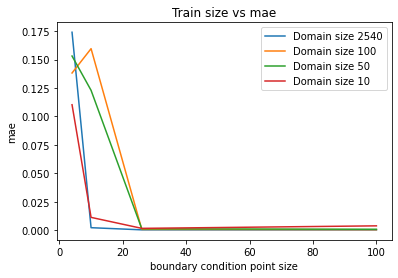

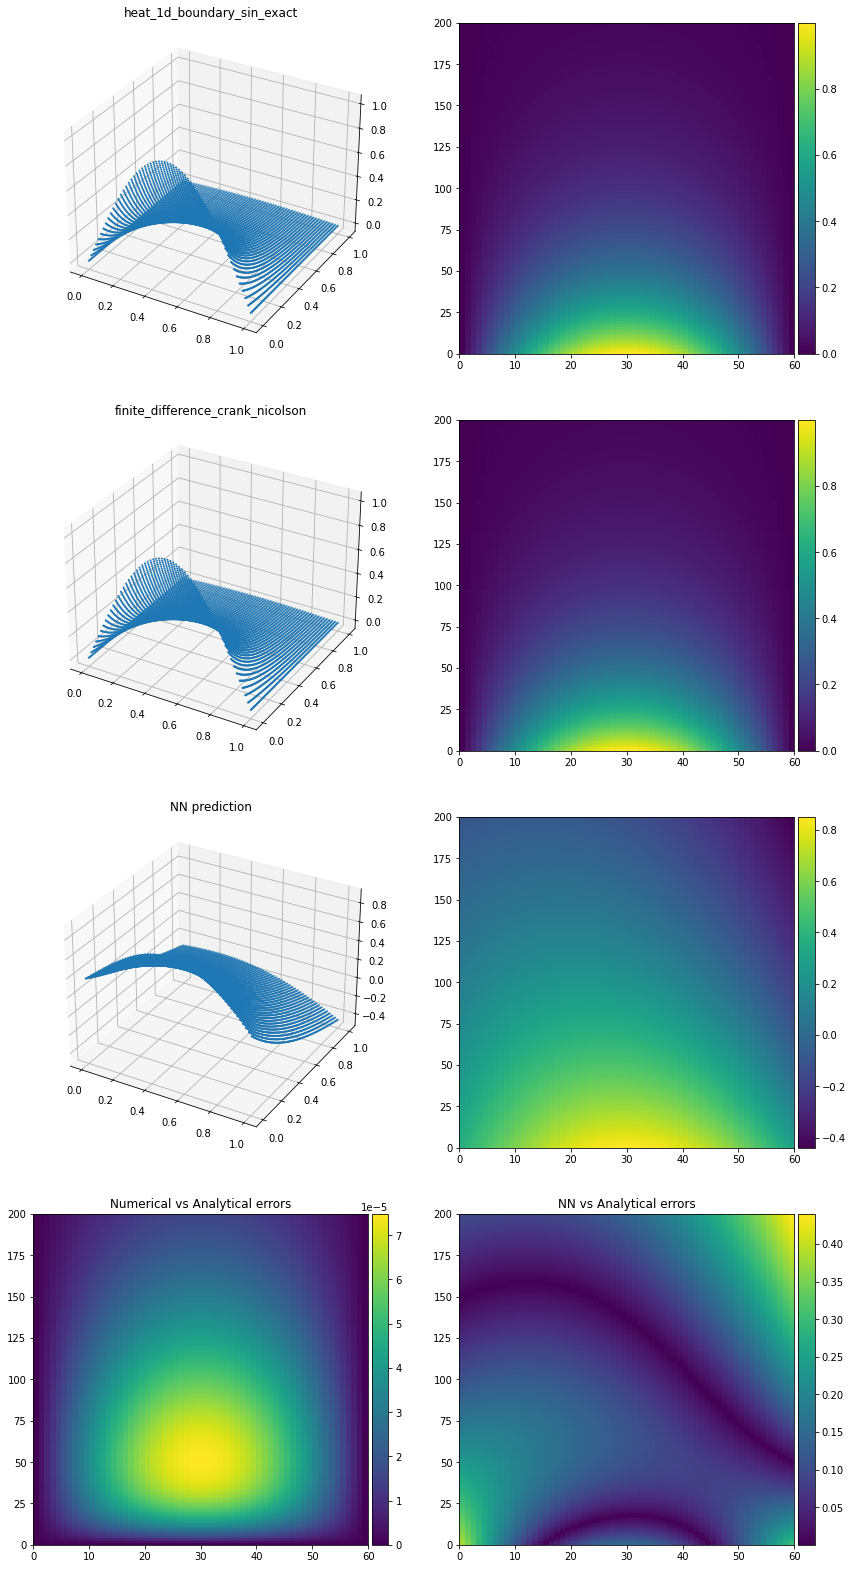

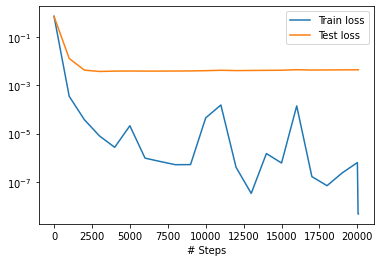

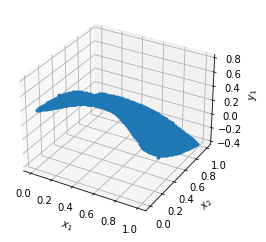

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.11031758683722338
Mean squared error:  0.01897556554400452
Max error:  0.4398767650127411
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Test Param: 
d_num_domain: 10
d_num_boundary: 2
d_num_initial: 2
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [5]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Domain size" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("boundary condition point size")
    ax.set_ylabel("mae")
    ax.title.set_text("Train size vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    predict_and_output_report(const_params, mae_dist_model[2], *model.train(), test_params=mae_dist_model[3])
